# Assignment 1 (15 + 15 Points)

The goal of this assignment is to get a better understanding of **sampling**, **confidence intervals**, **bootstrapping**, and **hypothesis testing**.

## Deadline
The deadline for this assignment is on **December 20th, 2024** at **23:59**. This is a hard deadline, therefore, no late submissions will be accepted.

You submit your assignment in the TeachCenter. Multiple submissions are allowed, so you can submit your code as often as you want. The last submission before the deadline will be graded; we have no access to previous versions.

## Submission Files
When you have completed the assignment, you will submit **exactly one** file:

- `<your-matr-number>_assignment1.ipynb`: This file contains all the code for the tasks.


Do not submit any other files. Make sure you use Python version ≥3.10.

**Important**: Please make sure that your uploaded file is named correctly: 
`<your-matr-number>_assignment1.ipynb`.

Doing otherwise will lead to **point deductions**!

**Example**: 
 - Student with matr nr. 00123456 -> `00123456_assignment1.ipynb`
 - Student with matr nr. 12345678 -> `12345678_assignment1.ipynb`

## Datasets
We provide you with 3 different datasets (spending_data_0, spending_data_1, spending_data_2). In the **assignment** only **spending_data_0** is used.

In the **quizzes**, **all** of the **3 datasets** are used. It will be specified in each question which one to use.

## Quizzes
Quizzes will be available in TeachCenter. The questions will focus on your implemented functions and their correctness. You will be given a set of possible results for **specific** function **parameters**. Your task is to select the correct answer based on **your functions'** output.

You have **unlimited time** for answering the questions during the test, but the deadline will be the same as for the code part (**December 20th, 2024** at **23:59**).

You have **two** attempts for each quiz and the **last attempt** counts.

## Plots
For plotting you are allowed to use the following packages: `matplotlib` or `seaborn`.

Ensure that your plots meet the minimum requirements outlined in the task description, and feel free to enhance them with additional information to improve clarity and visual appeal. It is not neccessary to store the plots as an image and submit them. Just show the plot in the notebook (e.g. plt.show() in matplotlib).

## Assistance
Please use the **Assignment 1 - Forum** section in the TC to ask questions regarding the tasks. Link to the forum: [Assignment 1 - Forum](https://tc.tugraz.at/main/mod/forum/view.php?id=469571)

## Plagiarism
By submitting your work, you agree that plagiarism tools will process your work.

You are allowed to discuss your assignment with colleagues, but you are not allowed to jointly work on the assignment, copy solutions, or share your code with others!

## AI Assistance

AI for assistance is allowed under the following conditions:
 - **Sparse usage**. Generating complete solutions without your own contribution is
prohibited.
 - Mark passages generated by AI. Link to source, i.e., chat history that was used for
generating the answers.
 - Similar to how StackOverflow can be used to provide assistance
(mark and link to source).
 - Example: Comment in function with
”This function was generated using ChatGPT: $\text{<link to chat>}$”

## Allowed Packages

Only use the already imported packages in the assignment template. If you really need additional packages (which shouldn't be the case), request it in the forum.

In [17]:
import pandas as pd
import numpy as np
import math
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

## Provided Functions


In [18]:
def read_data(dataset_number: int = 0) -> pd.DataFrame:
    """
    This helper function reads in a `csv` file based on the given `dataset_number`. 
    In the assignment, the `dataset_number` is always 0. In the quizzes the `dataset_number` is either 0, 1, or 2.

    Args:
        dataset_number (int, optional): The number of the dataset to load. Default is 0.

    Returns:
        pd.DataFrame: A `pandas` DataFrame used in the assignment.
    """
    return pd.read_csv(f"spending_data_{dataset_number}.csv")

# Tasks

**Scenario: The Coffee Shop Dilemma**  
You are a data scientist hired by *BrewMaster Coffee Shop*. The shop owner, Sarah, is curious about her customers’ habits and wants to make data-driven decisions to improve her business. Sarah has a dataset containing information about her customers’ spending in euros per visit. Unfortunately, she can only afford to collect data for a limited number of customers, so you need to analyze this sample and draw conclusions about her entire customer base.

---

## Part 1: Understanding the Data - Sampling [3 Points]

Sarah has collected spending data for 500 customers, stored in a file named `spending_data_0.csv`. Your first task is to load the data, take a random sample of size 75, and calculate the sample mean and standard deviation.

**Tasks:**
1. Load the `dataset` (`spending_data_0.csv`) and inspect the first few rows.
2. Implement the `sampling` function that takes the `dataset`, a random sample of `n=75` customers from the dataset and a `random_state=<your-matr-number>`.
3. **Important**: Use *either* 
    - `pandas.sample` (with the given random_state as a parameter) *OR* 
    - `numpy.random.choice` (with previously setting the seed with np.random.seed(random_state))

    to draw the random sample. Otherwise, you will get slightly different solutions in the quizzes!
4. Compute the sample mean and standard deviation.
5. Implement the `plot_sample_histogram` function that generates a histogram of the random sample and highlights the mean as a vertical line.
6. Call the `plot_sample_histogram` function and show the plot in the notebook (no need to store it as an image) by generating a sample with $n=75$ samples.


*Hint*: By previously setting the seed with `np.random.seed(random_state)` or directly in the `pandas.sample` function we ensure that the results are always the same. This is especially important later in the quizzes.

In [19]:
def sampling(dataset, n:int, random_state:int):
  
#Using pandas sample because it seemed shorter than numpy.random.choice and more intuitive for me
    
    sample = spending_data_0.sample(n=n, random_state=random_state)
    
    return sample

#Reading the given dataset
spending_data_0= pd.read_csv('C:/Users/tring/OneDrive/Desktop/ComputationalStatistics/spending_data_0.csv')

#calling the sampling function with n being 75 and my matrikel nr.
sample= sampling(spending_data_0, n=75, random_state= 11845777)

#here i am calculating the mean and standard diviation of the 'spending' column
sample_mean = sample['spending'].mean() 
sample_std_dev = sample['spending'].std()

#printing my functions
print(f"Sample Mean: {sample_mean:.2f}, Sample Std Dev: {sample_std_dev:.2f}")


Sample Mean: 9.79, Sample Std Dev: 3.07


In [20]:
#All the plotts are devided in an extra code cell because it just seemed more clean and intuitive for me
#I really hope that it will not equal in a deduction of points :)

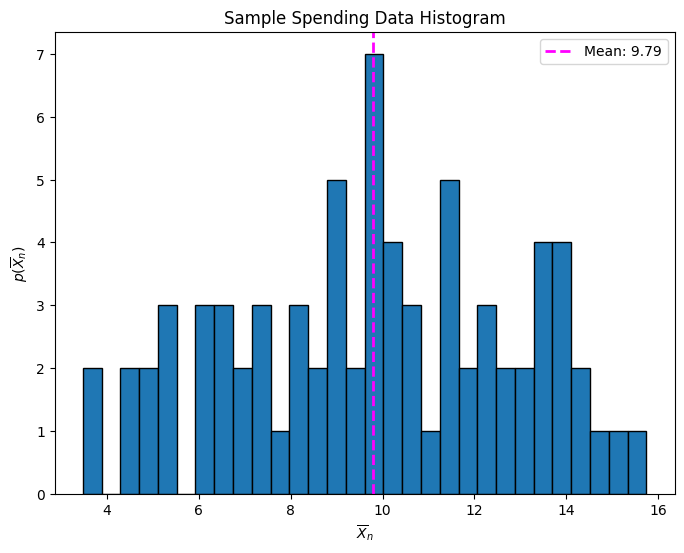

In [21]:

def plot_sample_histogram(sample, mean:float) -> None:

    plt.figure(figsize= (8,6))
#creating the Histogram, (bins=> intervals or ranges into what data is devided)

    plt.hist(sample, bins= 30, edgecolor= 'black', alpha = 1.0)
    
#here I am adding the vertical line that represents the mean

    plt.axvline(mean, color= 'magenta', linestyle= 'dashed', linewidth= 2, label= f'Mean: {mean:.2f}')

#bringing the histogram to life by adding the labels, title and legend aswell
    
    plt.xlabel(r'$\overline{X}_n$')
    plt.ylabel(r'$p(\overline{X}_n)$')
    plt.title('Sample Spending Data Histogram')
    plt.legend()


    # Calculate sample mean
sample_mean = sample['spending'].mean() 

# Plot histogram
plot_sample_histogram(sample, sample_mean)


## Part 2: Confidence Intervals [3 Points]

Sarah wants to estimate the average spending of her customers. Use the sample from Part 1 to calculate a 95% `z-score` confidence interval for the mean.

**Tasks:**
1. Implement the `confidence_interval` function that takes the `sample` from part 1 and a significance level `alpha=0.05`.
2. Compute the `z-score` confidence intervals for a given sample and confidence level using the standard score $z$: $$CI = \bar{x} \pm z\frac{\sigma}{\sqrt{n}},$$ with $\bar{x}$ being the sample mean, $z$ the standard score, $\sigma$ the standard deviation, and $n$ the length of the sample.
3. Implement the `plot_confidence_interval` function that generates a density plot of the sample and mark the lower and higher bounds of the confidence interval using vertical lines.
4. Call the `plot_confidence_interval` function and show the plot in the notebook (no need to store it as an image), use $\alpha=0.05$ and the previously generated sample from part 1.

_Tip: Use `stats.norm.ppf` for calculating $z$._

In [22]:
def confidence_interval(sample, alpha:float):
     
#here i calculate the sample statistics   
   sample_mean = sample['spending'].mean() 
   sample_std_dev = sample['spending'].std()
   n= len(sample)

#calculating the z-score that corresponds to the two tailed confidence interval
   z= stats.norm.ppf(1 - alpha/2)

#here i calculated the margin of error and the CI  
   margin_of_error = z * (sample_std_dev/ np.sqrt(n))
   ci_low = sample_mean -margin_of_error
   ci_high = sample_mean+ margin_of_error
   return ci_low, ci_high


alpha = 0.05 #represents the 95% confidence interval
ci_low, ci_high = confidence_interval(sample, alpha)

print(f"{(1-alpha):.0%} conv. interval: ({ci_low:.2f}, {ci_high:.2f})")

95% conv. interval: (9.10, 10.48)


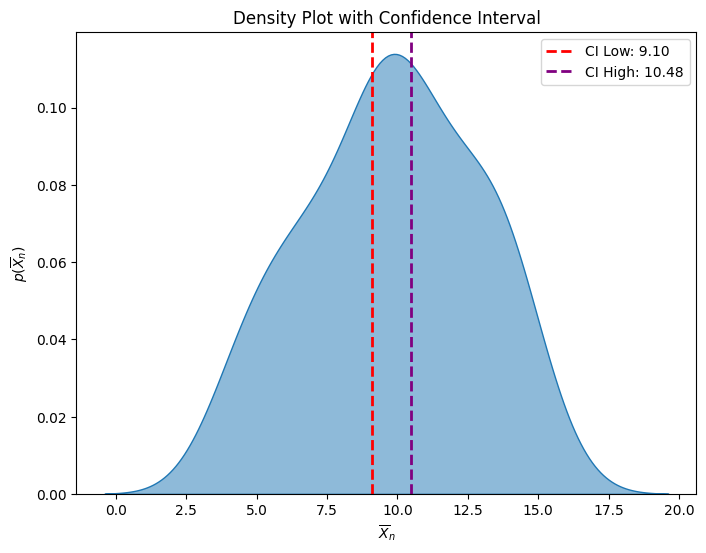

In [23]:
def plot_confidence_interval(sample, ci_low:float, ci_high:float) -> None:

#giving the same size as the fig. above
    plt.figure(figsize= (8,6))
#generating density plot and used fill instead of shade bc. the programm itself suggested so 
    sns.kdeplot(sample, fill= True, color="pink", alpha= 0.5)

    #this is the lower CI
    plt.axvline(ci_low, color='red', linestyle='dashed', linewidth=2, label=f"CI Low: {ci_low:.2f}")
    #this is the upper CI
    plt.axvline(ci_high, color='purple', linestyle='dashed', linewidth=2, label=f"CI High: {ci_high:.2f}")

#adding the labels, title and legend aswell
    plt.xlabel(r'$\overline{X}_n$')
    plt.ylabel(r'$p(\overline{X}_n)$')
    plt.title("Density Plot with Confidence Interval")
    plt.legend()
    plt.show()
#here the function is called so i can plot the confidence interval
plot_confidence_interval(sample, ci_low, ci_high)

## Part 3: Monte Carlo Method for Estimation [3 Points]

Sarah is planning a new promotion: If a customer spends more than 17€, they get a discount. She wants to know the probability that a randomly selected customer will spend more than 17€ based on historical data.

**Tasks:**
1. Implement the `monte_carlo` function that estimates if a customer spends more than a certain amount using the Monte Carlo method.
2. The function uses the historical data (the entire dataset), the number of simulations $b$ and number of samples $n$ per simulation step to calculate the probability of reaching a certain ${spending\_threshold}$
    - Do not set `random_state` for each sample.
    - Use `stats.norm.rvs` or `np.random.normal` to generate a sample of size $n$ from a normal distribution $N(\mu, \sigma)$.
    - The normal distribution $N(\mu, \sigma)$ is based on the mean $\mu$ and standard deviation $\sigma$ of the historical data.
3. Calculate and return the Monte Carlo probability $P_{MC}$: $$P_{MC}=\frac{\sum_{}^{b}\sum_{i=0}^{n} X_i>\text{spending\_threshold}}{b \cdot n}$$
4. Call the function with $b=10000, n=150, \text{spending\_threshold}=17$.

In [24]:
def monte_carlo(data, b:int, n:int, spending_threshold:float, random_state:int) -> float:
    
    np.random.seed(random_state)

    # here i calculate the mean (mü) and standard deviation (sigma) of the given data
    mü = data.mean()
    sigma = data.std()

    # Monte Carlo simulation
    
    count = 0  # using this to count the samples exceeding the threshold
    for _ in range(b):  # _ bc the loop variable is not relevant in my MC simulation
        nd_sample = np.random.normal(loc=mü, scale=sigma, size=n)  # Generating n samples from normal distribution N(mü,sigma)
        count += np.sum(nd_sample > spending_threshold)  # counting how many samples exceed the threshold

    mc_probability = count / (b * n)  # MC probability calculated
    return mc_probability


# Parameters given above along with my matrikel nr.
spending_threshold = 17 
b = 10000  
n = 150 
random_state = 11845777  

# i'm calling the function here
mc_prob = monte_carlo(spending_data_0, b, n, spending_threshold, random_state)

print(f"Probability of a customer spending more than {spending_threshold}€: {mc_prob:.4f} ({mc_prob*100:.2f}%)")


Probability of a customer spending more than 17€: 0.0103 (1.03%)


## Part 4: Bootstrapping [3 Points]

Sarah isn’t confident in the results derived from a single sample. She wants a robust way to estimate the average spending.

**Tasks:**
1. Implement the `bootstrap` function to perform bootstrapping **with replacement** on the sample.
2. The function takes the `sample` from part 1, `bs_sample_size=10000` bootstrap samples, and a significance level `alpha=0.05`.
2. Generate the bootstrap samples of sample-size `len(sample)`.
3. Compute the 95% bootstrap confidence intervals and print the bounds.
4. Re-use the `plot_confidence_interval` function from part 2 to generate the density plot of the sample.

Bootstrap 95% confidence interval computed using 10000 samples: (9.10, 10.48)


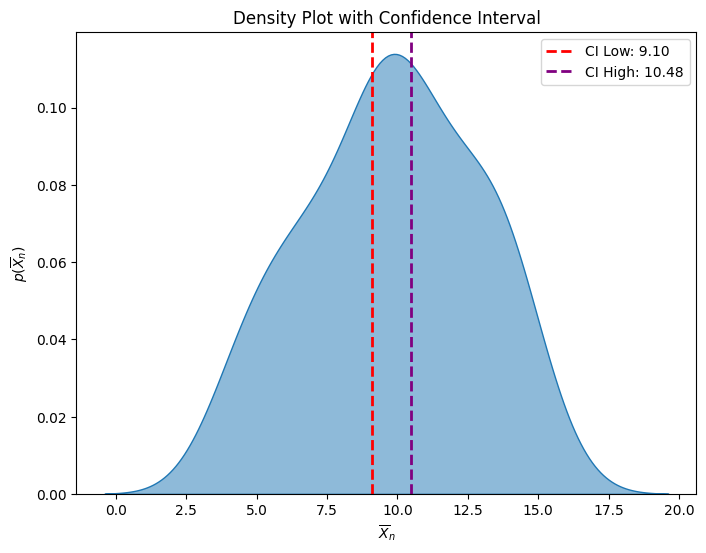

In [25]:
def bootstrap(sample, bs_sample_size:int, alpha:float, random_state:int) -> tuple[float, float]:
    
    np.random.seed(random_state)

    # converting it into a one-dimensional format which is required by np.random.choice
    # also stated in this website that i will get a ValueError when not 1-dimensional: NumPy Developers. (n.d.). numpy.random.choice.
    #  NumPy. Retrieved December 20, 2024, from https://numpy.org/doc/2.1/reference/random/generated/numpy.random.choice.html
    sample = sample.to_numpy().flatten() if isinstance(sample, (pd.Series, pd.DataFrame)) else sample

    
    # Bootstrap sample and their means
    bootstrap_means = []
    for _ in range(bs_sample_size):
        # Generate a bootstrap sample with replacement
        bs_sample = np.random.choice(sample, size=len(sample), replace=True)
        # calculating the mean of the bootstrap sample
        bootstrap_means.append(bs_sample.mean())

    # Calculate the bootstrap confidence intervals using percentiles
    ci_low = np.percentile(bootstrap_means, 100 * (alpha / 2), method='linear')
    ci_high = np.percentile(bootstrap_means, 100 * (1 - alpha / 2), method='linear')

    return ci_low, ci_high

# the given parameters
bs_sample_size = 10000 
alpha = 0.05  
random_state = 11845777  

# Calling the bootstrap function
ci_low_bs, ci_high_bs = bootstrap(sample, bs_sample_size, alpha, random_state)


print(f"Bootstrap {(1-alpha):.0%} confidence interval computed using {bs_sample_size} samples: ({ci_low_bs:.2f}, {ci_high_bs:.2f})")

# plotting of the confidence interval
plot_confidence_interval(sample, ci_low_bs, ci_high_bs)




## Part 5: Hypothesis Testing

After observing the spending of some of the last customers, Sarah suspects that the average customer spending is €12. Conduct a hypothesis test to validate her assumption.

**Tasks:**
1. Draw a new `sample` with a size of `25`.
2. Implement the `hypothesis_test` function that takes this new `sample` and the `suspected_spending`.
3. Think about if the hypothesis is simple or composite and if you need a one-sided or a two-sided t-test.
4. Use [`stats.ttest_1samp`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html) with the `sample` to compute and return the t-test `statistic` and `p-value` for testing Sarah’s claim.
5. Implement the `plot_hypothesis_test` function that plots the t-distibution, highlights the critical regions, and t-test statistic for the given suspected_spending.

In [26]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

#now that I am drawing a new sample size I had to explicitly put in the data set and the other data again 
# ( used Chat GPT for it since I didnt have the logic for it)
def sampling(dataset, n:int, random_state:int):
    sample = dataset.sample(n=n, random_state=random_state)
    return sample


spending_data = pd.read_csv('C:/Users/tring/OneDrive/Desktop/ComputationalStatistics/spending_data_0.csv')


sample_size = 25
random_state = 11845777
sample = sampling(spending_data, n=sample_size, random_state=random_state)

#Here I am defying the hypothesis test
def hypothesis_test(sample, suspected_spending:float) -> tuple[float, float]:
    sample_values = sample['spending']  # Extract the spending column
    statistic, p_value = stats.ttest_1samp(sample_values, suspected_spending)
    return statistic, p_value

# the hypothesis thats being testet(Saras assumption)
suspected_spending = 12

# performing test
statistic, p_value = hypothesis_test(sample, suspected_spending)


alpha = 0.05
print(f"T-statistic: {statistic:.4f}, P-value: {p_value:.4f}")

if p_value < alpha:
    print(f"Reject the null hypothesis: the average spending is not {suspected_spending}€.")
else:
    print(f"Fail to reject the null hypothesis: the average spending is {suspected_spending}€.")





T-statistic: -4.1844, P-value: 0.0003
Reject the null hypothesis: the average spending is not 12€.


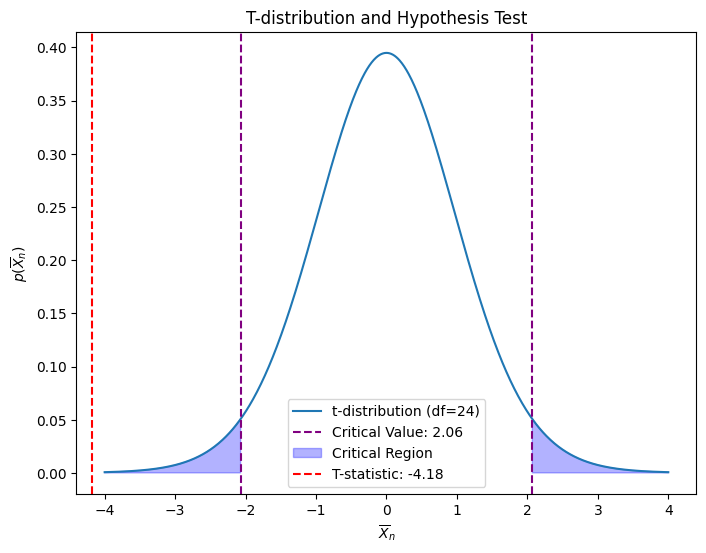

In [27]:
#plotting the hypothesis test
def plot_hypothesis_test(statistic:float, sample_size:int, alpha:float) -> None:
    df = sample_size - 1  # Degrees of freedom
    x = np.linspace(-4, 4, 1000)
    y = stats.t.pdf(x, df)

    #  t-destribution plot
    plt.figure(figsize=(8, 6))
    plt.plot(x, y, label=f't-distribution (df={df})')

    # marking the critical values
    critical_value = stats.t.ppf(1 - alpha / 2, df)
    plt.axvline(x=critical_value, color='purple', linestyle='dashed', label=f'Critical Value: {critical_value:.2f}')
    plt.axvline(x=-critical_value, color='purple', linestyle='dashed')
    plt.fill_between(x, y, where=(x >= critical_value) | (x <= -critical_value), color='blue', alpha=0.3, label='Critical Region')

    # marking t-statistic
    plt.axvline(x=statistic, color='red', linestyle='dashed', label=f'T-statistic: {statistic:.2f}')

    
    plt.title("T-distribution and Hypothesis Test")
    plt.xlabel(r'$\overline{X}_n$')
    plt.ylabel(r'$p(\overline{X}_n)$')
    plt.legend(loc="best")
    plt.show()

# Visualization of  the hypothesis test
plot_hypothesis_test(statistic, sample_size, alpha)
